In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv(r'/content/test(grayscale).csv')
df

,Index,label,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1015,f_1016,f_1017,f_1018,f_1019,f_1020,f_1021,f_1022,f_1023,f_1024
0,12,अ,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,27,अ,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,30,अ,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,33,अ,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,36,अ,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3886,415,कौ,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3887,421,कौ,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3888,423,कौ,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3889,426,कौ,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [ ]:
df.shape

(3891, 1026)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3891 entries, 0 to 3890
Columns: 1026 entries, Index to f_1024
dtypes: float64(1010), int64(15), object(1)
memory usage: 30.5+ MB


In [ ]:
df.describe()

,Index,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1015,f_1016,f_1017,f_1018,f_1019,f_1020,f_1021,f_1022,f_1023,f_1024
count,3891.000000,3891.000000,3891.000000,3891.000000,3891.000000,3891.000000,3891.000000,3891.000000,3891.000000,3891.000000,...,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.0,3890.0,3890.0,3890.0,3890.0
mean,391.022359,254.999743,254.997430,254.986379,254.952968,254.905166,254.848625,254.798252,254.770496,254.760473,...,254.953213,254.968380,254.983805,254.994602,254.999743,255.0,255.0,255.0,255.0,255.0
std,229.361497,0.016031,0.064082,0.222326,0.529440,0.846284,1.133260,1.352008,1.431922,1.419363,...,0.516004,0.445286,0.252516,0.102535,0.016033,0.0,0.0,0.0,0.0,0.0
min,1.000000,254.000000,252.000000,248.000000,244.000000,241.000000,241.000000,241.000000,241.000000,241.000000,...,244.000000,245.000000,247.000000,251.000000,254.000000,255.0,255.0,255.0,255.0,255.0
25%,190.500000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.0,255.0,255.0,255.0,255.0
50%,384.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.0,255.0,255.0,255.0,255.0
75%,593.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.0,255.0,255.0,255.0,255.0
max,792.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.0,255.0,255.0,255.0,255.0


In [ ]:
df.isnull().sum()

Index     0
label     0
f_1       0
f_2       0
f_3       0
         ..
f_1020    1
f_1021    1
f_1022    1
f_1023    1
f_1024    1
Length: 1026, dtype: int64

<ipython-input-8-e0d0c2027324>:17: UserWarning: Glyph 2309 (\N{DEVANAGARI LETTER A}) missing from current font.
  plt.tight_layout()
<ipython-input-8-e0d0c2027324>:17: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
<ipython-input-8-e0d0c2027324>:17: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from current font.
  plt.tight_layout()
<ipython-input-8-e0d0c2027324>:17: UserWarning: Glyph 2307 (\N{DEVANAGARI SIGN VISARGA}) missing from current font.
  plt.tight_layout()
<ipython-input-8-e0d0c2027324>:17: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from current font.
  plt.tight_layout()
<ipython-input-8-e0d0c2027324>:17: UserWarning: Glyph 2311 (\N{DEVANAGARI LETTER I}) missing from current font.
  plt.tight_layout()
<ipython-input-8-e0d0c2027324>:17: UserWarning: Glyph 2312 (\N{DEVANAGARI LETTER II}) missing from current font.
  plt.tight_layout()
<ipython-input-8-e0d0c2027324>:17: UserWarning: Glyph 2313 (\N{

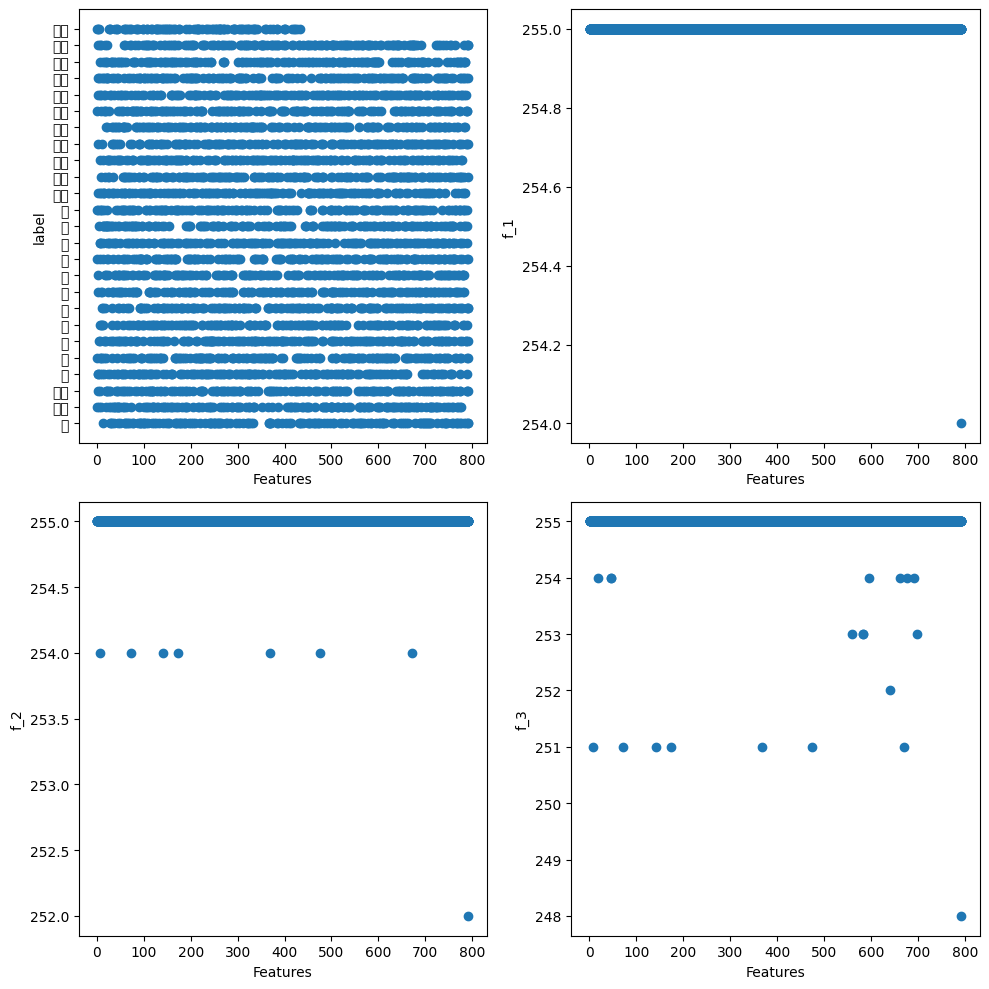

In [ ]:
# Using subplot to plot first 12
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Flatten axes array for easy iteration
axes_flat = axes.flat

# Iterate over axes and DataFrame columns
for i, ax in enumerate(axes_flat):
    if i < len(df.columns) - 1:
        ax.scatter(df.iloc[:, 0], df.iloc[:, i + 1])
        ax.set_xlabel('Features')
        ax.set_ylabel(df.columns[i + 1])
    else:
        ax.set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
# Select the feature columns and the target variable
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (3112, 1024)
X_test dimension=  (779, 1024)
y_train dimension=  (3112,)
y_train dimension=  (779,)


In [ ]:
# Create a pipeline with an imputer and LogisticRegression
pl = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('logistic_regression', LogisticRegression(multi_class='ovr', solver='liblinear'))
])

# Fit the pipeline to the data
pl.fit(X_train, y_train)

# Make predictions
y_pred = pl.predict(X_test)

# Display the pipeline
pl

Pipeline(steps=[('imputer', SimpleImputer()),
                ('logistic_regression',
                 LogisticRegression(multi_class='ovr', solver='liblinear'))])

In [ ]:
# Print predicted values
y_pred

array(['कू', 'कं', 'कै', 'ऊ', 'अं', 'ऐ', 'अः', 'अ', 'कं', 'अः', 'कु', 'ए',
       'ऐ', 'आ', 'अं', 'अ', 'ऊ', 'ऊ', 'कू', 'कौ', 'उ', 'इ', 'को', 'ऋ',
       'के', 'अ', 'ई', 'की', 'इ', 'अः', 'कः', 'ओ', 'औ', 'कि', 'की', 'क',
       'कि', 'ओ', 'कि', 'के', 'ऊ', 'कू', 'आ', 'क', 'उ', 'कः', 'औ', 'कू',
       'उ', 'ऋ', 'कौ', 'अं', 'औ', 'कु', 'ओ', 'ई', 'ऐ', 'अं', 'कि', 'अं',
       'इ', 'ऊ', 'कु', 'अः', 'कू', 'ए', 'ऋ', 'क', 'कि', 'ओ', 'ऐ', 'कं',
       'को', 'कु', 'ई', 'ऊ', 'कै', 'के', 'ओ', 'ई', 'अः', 'क', 'ओ', 'ओ',
       'कः', 'ऊ', 'कं', 'कि', 'ए', 'ओ', 'क', 'औ', 'ई', 'कः', 'ओ', 'अः',
       'ऋ', 'ऐ', 'को', 'के', 'ई', 'ऊ', 'अ', 'कै', 'कू', 'ई', 'क', 'उ',
       'ऐ', 'कौ', 'उ', 'कै', 'अ', 'को', 'ई', 'ई', 'कं', 'को', 'क', 'कं',
       'आ', 'क', 'ऋ', 'आ', 'के', 'कै', 'ओ', 'कः', 'का', 'ऐ', 'को', 'कु',
       'अ', 'अं', 'का', 'कं', 'कः', 'कू', 'अः', 'अं', 'के', 'कै', 'अं',
       'उ', 'ई', 'इ', 'कं', 'कु', 'अः', 'अः', 'का', 'ऐ', 'उ', 'उ', 'कि',
       'के', 'कि', 'को', 'उ', 'को', 'ई', 'कौ', 'अ', 'की',

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.982028241335045
Classification Report:
               precision    recall  f1-score   support

           अ       1.00      0.97      0.99        35
          अं       1.00      1.00      1.00        45
          अः       1.00      0.97      0.99        36
           आ       0.97      1.00      0.98        29
           इ       1.00      1.00      1.00        24
           ई       1.00      1.00      1.00        31
           उ       1.00      1.00      1.00        39
           ऊ       1.00      1.00      1.00        36
           ऋ       1.00      1.00      1.00        28
           ए       1.00      1.00      1.00        32
           ऐ       1.00      1.00      1.00        29
           ओ       0.88      1.00      0.94        30
           औ       1.00      0.83      0.91        30
           क       1.00      0.94      0.97        35
          कं       1.00      0.97      0.98        32
          कः       0.93      1.00      0.96        26
          का       1.00      

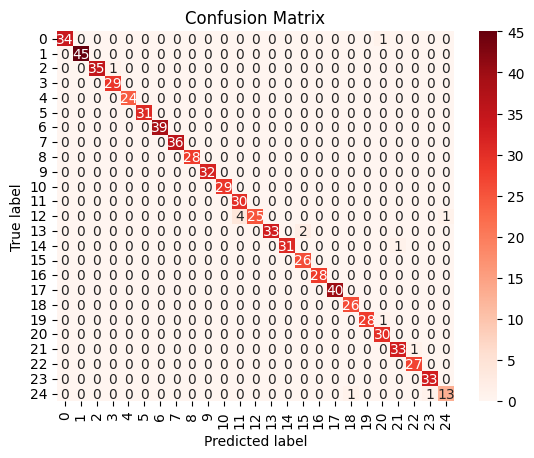

In [ ]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# print precision recall  f1-score separately
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and f1-score for each class
precision = precision_score(y_test, pl.predict(X_test), average=None)
recall = recall_score(y_test, pl.predict(X_test), average=None)
f1 = f1_score(y_test, pl.predict(X_test), average=None)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: [1.         1.         1.         0.96666667 1.         1.
 1.         1.         1.         1.         1.         0.88235294
 1.         1.         1.         0.92857143 1.         1.
 0.96296296 1.         0.9375     0.97058824 0.96428571 0.97058824
 0.92857143]
Recall: [0.97142857 1.         0.97222222 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.83333333 0.94285714 0.96875    1.         1.         1.
 1.         0.96551724 1.         0.97058824 1.         1.
 0.86666667]
F1-score: [0.98550725 1.         0.98591549 0.98305085 1.         1.
 1.         1.         1.         1.         1.         0.9375
 0.90909091 0.97058824 0.98412698 0.96296296 1.         1.
 0.98113208 0.98245614 0.96774194 0.97058824 0.98181818 0.98507463
 0.89655172]
